In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
from scipy import stats

# <font color = 'red'> ЛР 6. Метод k-ближайших соседей. Классификаторы на различных данных. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 1.11.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Метод k-ближайших соседей.  </font>

Метод ближайщих соседей - один из самых интуитивно понятных но в тоже время эффективных методов класссификации.

Общая идея метода.

1. Предварительное обучение не требуется. Прогноз делается на основе известных данных.
2. Для тестового вектора признаков $\overline{x_{0}}$ находим ближайшие $k$ в пространстве признаков с помощью заданной метрики.
3. Классифицируем $\overline{x_{0}}$  по большинству меток представителей множества $k$ соседей из п 2. 

Подробнее [тут](https://habr.com/ru/articles/149693/) 


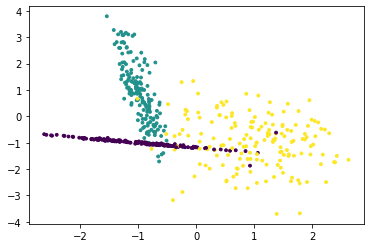

In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=3, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1],c=y,s=8)

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *KNeighborsClassifier*.
4. Сравните работу полученных моеделей.
5. Изучите и эмпирически протестируйте гиперпараметры моделей для вашей и встроенной функции.
6. Можно ли переобучить классификатор k-ближайших соседей? Эмпирически подтвердите!

In [3]:
import random
import math
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [55]:
class KNNClassifier:
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        if self.p == 1:
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        if self.p == 2:
            distances = [np.linalg.norm(x - x_train, 2) for x_train in self.X_train]
        else:
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def accuracy(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)

    def precision(self, y_true, y_pred):
        return precision_score(y_true, y_pred, average='weighted')

    def recall(self, y_true, y_pred):
        return recall_score(y_true, y_pred, average='weighted')

    def f1_score(self, y_true, y_pred):
        return f1_score(y_true, y_pred, average='weighted')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [57]:
knn = KNNClassifier(k=7)
knn.fit(X_train, y_train)

In [58]:
y_pred = knn.predict(X_test)

In [59]:
def plot_decision_boundary(X, y, model):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=0.8)
    plt.show()

In [60]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X_train, y_train)

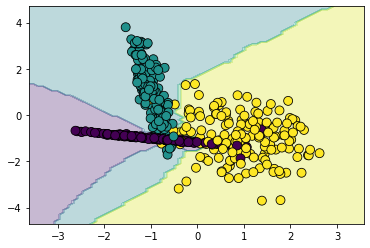

In [61]:
plot_decision_boundary(X, y, knn_classifier)

In [12]:
knn_classifier = KNNClassifier(k=7)
knn_classifier.fit(X_train, y_train)

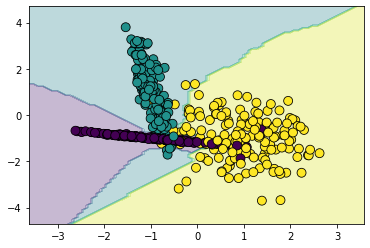

In [13]:
plot_decision_boundary(X, y, knn_classifier)

In [14]:
knn_classifier = KNNClassifier(k=7, p=1)
knn_classifier.fit(X_train, y_train)

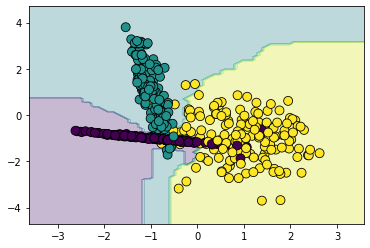

In [15]:
plot_decision_boundary(X, y, knn_classifier)

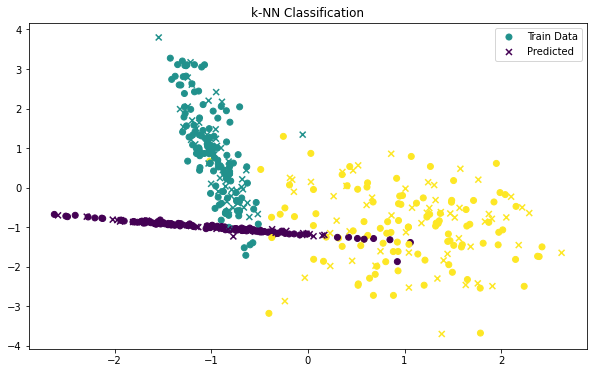

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', cmap='viridis', label='Train Data')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', cmap='viridis', label='Predicted')
plt.title('k-NN Classification')
plt.legend()
plt.show()

In [16]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = knn_classifier.accuracy(y_test, y_pred)
precision = knn_classifier.precision(y_test, y_pred)
recall = knn_classifier.recall(y_test, y_pred)
f1 = knn_classifier.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [18]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Наилучшие гиперпараметры:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)


Наилучшие гиперпараметры: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Точность на тестовом наборе: 0.9666666666666667


In [19]:
k = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20]
p = [1, 2]

for i in k:
    for j in p:
        knn = KNNClassifier(k = i, p = j)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print('k = ', i, 'p = ', j)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f'Accuracy: {accuracy:.2f} ', f'Precision: {precision:.2f} ', f'Recall: {recall:.2f} ', f'F1 Score: {f1:.2f}')

k =  1 p =  1
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  1 p =  2
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  2 p =  1
Accuracy: 0.95  Precision: 0.96  Recall: 0.95  F1 Score: 0.95
k =  2 p =  2
Accuracy: 0.95  Precision: 0.96  Recall: 0.95  F1 Score: 0.95
k =  3 p =  1
Accuracy: 0.97  Precision: 0.97  Recall: 0.97  F1 Score: 0.97
k =  3 p =  2
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  4 p =  1
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  4 p =  2
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  5 p =  1
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  5 p =  2
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  6 p =  1
Accuracy: 0.95  Precision: 0.95  Recall: 0.95  F1 Score: 0.95
k =  6 p =  2
Accuracy: 0.94  Precision: 0.94  Recall: 0.94  F1 Score: 0.94
k =  7 p =  1
Accuracy: 0.95  Precision: 0.96  Recall: 0.95  F1 Score: 0.95
k =  7 p =  

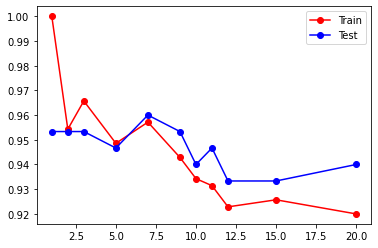

In [20]:
k = [1, 2, 3, 5, 7, 9, 10, 11, 12, 15, 20]
scores_test = []
scores_train = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    scores_test.append(knn.score(X_test, y_test))
    scores_train.append(knn.score(X_train, y_train))
    
plt.plot(k, scores_train, 'r-o')
plt.plot(k, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

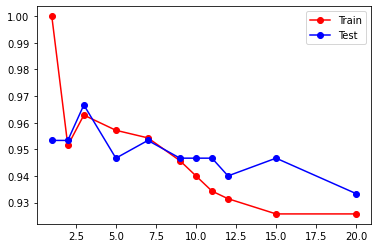

In [21]:
k = [1, 2, 3, 5, 7, 9, 10, 11, 12, 15, 20]
scores_test = []
scores_train = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, p=1)
    knn.fit(X_train, y_train)
    scores_test.append(knn.score(X_test, y_test))
    scores_train.append(knn.score(X_train, y_train))
    
plt.plot(k, scores_train, 'r-o')
plt.plot(k, scores_test, 'b-o')
plt.legend(['Train', 'Test'])

В контексте переобучения, KNN обладает свойством гибкости и неявно адаптируется к форме данных обучения. Это означает, что классификатор KNN может быть более подвержен переобучению, если количество соседей k выбрано слишком маленьким или если имеется большое количество признаков, которые несут мало информации.

## <font color = 'green'> 2. Элементарная работа с изображениями  </font>

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

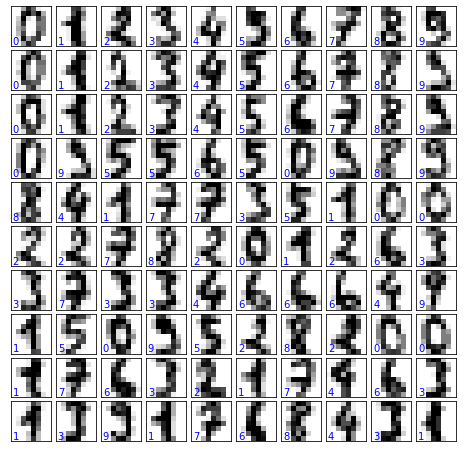

In [40]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [44]:
X = digits.data
X.shape

(1797, 64)

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать изображения как векторы числовых признаков?
2. Реализуйте классификатор для определения цифры на изображении используя различные модели, изученные в ЛР4-ЛР6. 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

Изображения могут быть рассмотрены как векторы числовых признаков. Каждый пиксель изображения представляется числовым значением, которое указывает на интенсивность цвета в данной точке. Эти значения пикселей могут быть организованы в вектор признаков.

Например, для черно-белого изображения каждый пиксель представлен одним числом (обычно от 0 до 255), и изображение может быть представлено вектором, где каждый элемент вектора соответствует значению пикселя.

Для цветных изображений, каждый пиксель может быть представлен тройкой чисел (например, RGB), и изображение будет представлено вектором трехмерных признаков.

In [45]:
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Логистическая регрессия

In [49]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy for Logistic Regression: {accuracy_lr}')

Accuracy for Logistic Regression: 0.975


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



#### Дерево принятия решений

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree: {accuracy_dt}')


Accuracy for Decision Tree: 0.8444444444444444


In [54]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.85      0.79      0.81        28
           2       0.86      0.76      0.81        33
           3       0.79      0.91      0.85        34
           4       0.75      0.87      0.81        46
           5       0.89      0.89      0.89        47
           6       0.92      0.94      0.93        35
           7       0.88      0.82      0.85        34
           8       0.72      0.70      0.71        30
           9       0.82      0.82      0.82        40

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



#### k-ближайших соседей

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for k-Nearest Neighbors: {accuracy_knn}')


Accuracy for k-Nearest Neighbors: 0.9861111111111112


In [56]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



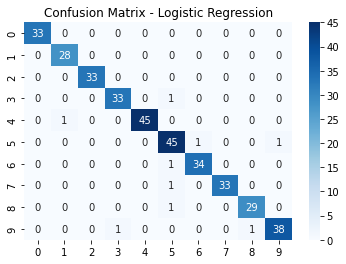

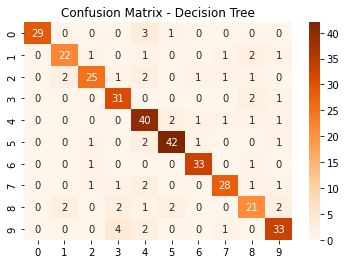

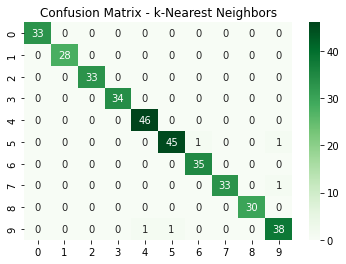

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок для логистической регрессии
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Матрица ошибок для дерева принятия решений
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Матрица ошибок для k-ближайших соседей
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()


## <font color = 'green'> 3. Работа с текстом.  </font>

Текстовые признаки также можно сводить к числовым. Для этого существует ряд подходов, которые изучаются подробно в отдельном разделе науки о данных. Наша задача изучить один из них. TF-IDF -векторизацию.

Подробнее [тут](https://yandex.ru/q/datascience/8268666625/).

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

test = X.toarray()
test

array([[0.        , 0.27824521, 0.4711101 , 0.4711101 , 0.        ,
        0.        , 0.        , 0.4711101 , 0.        , 0.        ,
        0.35829137, 0.35829137, 0.        ],
       [0.40619178, 0.31544415, 0.        , 0.        , 0.53409337,
        0.53409337, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40619178, 0.        ],
       [0.32412354, 0.25171084, 0.        , 0.        , 0.        ,
        0.        , 0.4261835 , 0.        , 0.4261835 , 0.4261835 ,
        0.32412354, 0.        , 0.4261835 ]])

In [8]:
vectorizer.vocabulary_

{'it': 3,
 'is': 2,
 'going': 1,
 'to': 10,
 'rain': 7,
 'today': 11,
 'am': 0,
 'not': 4,
 'outside': 5,
 'watch': 12,
 'the': 9,
 'season': 8,
 'premiere': 6}

<font color = 'red' size = 5>Задание 3 </font>

1. Изучите код в ячейках выше. Можно ли рассматривать тексты как векторы числовых признаков?
2. Реализуйте классификатор (на основе любой изученной вами модели) для определения эмоционального оттенка отзывов к фильмам. 
   Для преобразования текста используйте векторизацию TF-IDF. Предварительно минимально обработайте текст (стоп-слова, леммантизатор, посторонние символы) 
3. Тщательно оцените качество полученных моделей и сделайте выводы.

**Учитывайте, что векторизатор значительно увеличивает количество фич! Будьте внимательны со скоростью и производительностью!**

[Датасет](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

TF-IDF (Term Frequency-Inverse Document Frequency): Этот метод также основан на представлении текста в виде вектора слов, но вместо частоты вхождения каждого слова используется взвешенное значение, учитывающее, насколько слово уникально для данного текста относительно всего корпуса текстов.


#### 1. Term Frequency (TF) - Частота слова в документе

$ \text{TF}(t, d) = \frac{\text{Количество раз, когда слово } t \text{ встречается в документе } d}{\text{Общее количество слов в документе } d} $

#### 2. Inverse Document Frequency (IDF) - Обратная частота документа

$\text{IDF}(t, D) = \log\left(\frac{\text{Общее количество документов в корпусе } D}{\text{Количество документов, содержащих слово } t + 1}\right) + 1 $

#### 3. TF-IDF вектор

$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $

Этот вектор представляет слово в виде числа, учитывая и его частоту в конкретном документе, и его обратную частоту в корпусе.

In [331]:
data = pd.read_csv('IMDB Dataset.csv')

In [315]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [65]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub("[^0-9a-zA-Z]"," ", text)
    text = re.sub(r'<br\s*/*\s*>', '', text)
    text = re.sub(r'(<br\s*/?>)+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    
    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    words = [lemmatizer.lemmatize(word, pos='n') for word in words]
    words = [lemmatizer.lemmatize(word, pos='r') for word in words]
    words = [lemmatizer.lemmatize(word, pos='a') for word in words]
    
    #unique_words = list(set(words))

    processed_text = ' '.join(words)
    
    return processed_text

In [187]:
orig_text = 'HI i went then go to the school'

preprocessed_text = preprocess_text(orig_text)
print(preprocessed_text)

school go hi


In [333]:
for i in range(len(data['review'])):
    data['review'][i] = preprocess_text(data['review'][i])

In [198]:
data['review'][2]

'witty weekend right hot even young well charact woodi imag style go prada spend lightheart comedi theater likabl great ive fulli interest realiz one air witti friend womanbr dare manag career allen serial match lovebr u summer proof jump suspect think bread impress disappoint say time averag laugh sit control watch dialogu simplist still plot superman id spirit wonder johanson wear crown jewel grow see tone scarlet way mani sexi may year risk condit addict point br killer devil never decad'

In [338]:
data['review'][2]

'think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint realize match point 2 risk addiction think proof woody allen still fully control style many u grow love br br laugh one woody comedy year dare say decade never impress scarlet johanson manage tone sexy image jump right average spirit young woman br br may crown jewel career witty devil wear prada interest superman great comedy go see friend'

In [334]:
Doc = [data['review'][i] for i in range(len(data['review']))]

In [335]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Doc)

In [123]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [336]:
d = {'positive' : 1, 'negative' : 0}
data['sentiment'] = data['sentiment'].map(d)

In [222]:
y = data.sentiment

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [210]:
y_pred = model.predict(X_test)

In [211]:
from sklearn.metrics import classification_report

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [234]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [235]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for k-Nearest Neighbors: {accuracy_knn}')

Accuracy for k-Nearest Neighbors: 0.7831


In [237]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      4961
           1       0.75      0.85      0.80      5039

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



## <font color = 'green'> 4. Обзор простейших моделей классификации.  </font>

<font color = 'red' size = 5>Задание 4 </font>


1. Проведите предварительную обработку данных.
2. Постройте модели классификации на основе различных методов, изученных вами из встроееной библиотеки. 
3. Подберите оптимальные гиперпараметры моделей используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!

[Датасет](https://www.kaggle.com/c/titanic/data?select=test.csv)






In [259]:
titanic_train = pd.read_csv('train.csv')

In [260]:
titanic_test = pd.read_csv('test.csv')

In [261]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [286]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item,Relatives,SoloTraveller,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,330911,NONE,0,Yes,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,363272,NONE,1,No,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,240276,NONE,0,Yes,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,315154,NONE,0,Yes,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3101298,NONE,2,No,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3236,A.5.,0,Yes,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,17758,PC,0,Yes,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3101262,SOTON/O.Q.,0,Yes,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,359309,NONE,0,Yes,Mr


In [243]:
gensub = pd.read_csv('gender_submission.csv')

In [262]:
women = titanic_train.loc[titanic_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [263]:
men = titanic_train.loc[titanic_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


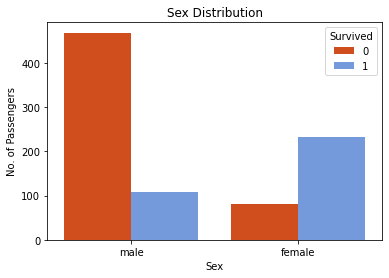

In [268]:
sns.countplot(data=titanic_train, x='Sex', hue='Survived', palette=['#EE4000', 'cornflowerblue'])
plt.xlabel('Sex')
plt.ylabel('No. of Passengers')
plt.title('Sex Distribution')
plt.show()

In [296]:
for data in [titanic_train, titanic_test]:
    mean = titanic_train['Age'].mean() # среднее значение возраста в столбце "Age"
    std = titanic_train['Age'].std() # стандартное отклонение возраста в столбце "Age" 
    data_null = data['Age'].isnull().sum() # количество пропущенных значений
    
    data_age_random = np.random.randint(mean - std, mean + std, size=data_null)
    
    data_age = data['Age'].copy()
    data_age[np.isnan(data_age)] = data_age_random
    data['Age'] = data_age
    data['Age'] = data["Age"].astype(int)

In [301]:
titanic_train['Age'].isna().sum()

0

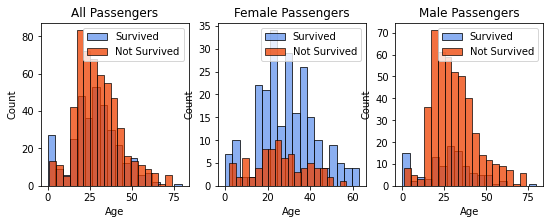

In [257]:
women = titanic_train[titanic_train['Sex'] == 'female']
men = titanic_train[titanic_train['Sex'] == 'male']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax1 = sns.histplot(titanic_train[titanic_train['Survived'] == 1].Age, bins=18, label = 'Survived', ax=axs[0], color='cornflowerblue')
ax1 = sns.histplot(titanic_train[titanic_train['Survived'] == 0].Age, bins=18, label = 'Not Survived', ax=axs[0], color='#EE4000')
ax1.legend()
ax1.set_title('All Passengers')
ax2 = sns.histplot(women[women['Survived'] == 1].Age, bins=18, label = 'Survived', ax=axs[1], color='cornflowerblue')
ax2 = sns.histplot(women[women['Survived'] == 0].Age, bins=18, label = 'Not Survived', ax=axs[1], color='#EE4000')
ax2.legend()
ax2.set_title('Female Passengers')
ax3 = sns.histplot(men[men['Survived'] == 1].Age, bins=18, label = 'Survived', ax=axs[2], color='cornflowerblue')
ax3 = sns.histplot(men[men['Survived'] == 0].Age, bins=18, label = 'Not Survived', ax=axs[2], color='#EE4000')
ax3.legend()
ax3.set_title('Male Passengers')
plt.show()

In [269]:
titanic_train['Embarked'].mode()

0    S
dtype: object

In [270]:
titanic_train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [271]:
mode = titanic_train['Embarked'].mode()
for data in [titanic_train, titanic_test]:
    data['Embarked'] = data['Embarked'].fillna(mode[0])

In [272]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,211536,NONE
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,112053,NONE
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,6607,W./C.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,111369,NONE


In [273]:
embarked = titanic_train.groupby(['Embarked'])['Survived'].aggregate(['sum', 'count', 'mean'])
embarked

,sum,count,mean
Embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,219,646,0.339009


In [274]:
for data in [titanic_train, titanic_test]:
    data['Relatives'] = data['SibSp'] + data['Parch']
    data.loc[data['Relatives'] > 0, 'SoloTraveller'] = 'No'
    data.loc[data['Relatives'] == 0, 'SoloTraveller'] = 'Yes'
    
traveller = titanic_train.groupby(['Relatives'])[['Survived']].aggregate(['sum', 'count', 'mean'])
traveller

Survived                
               sum count      mean
Relatives                         
0              163   537  0.303538
1               89   161  0.552795
2               59   102  0.578431
3               21    29  0.724138
4                3    15  0.200000
5                3    22  0.136364
6                4    12  0.333333
7                0     6  0.000000
10               0     7  0.000000

In [275]:
solo_traveller = titanic_train.groupby(['SoloTraveller'])[['Survived']].aggregate(['sum', 'count', 'mean'])
solo_traveller

Survived                
                   sum count      mean
SoloTraveller                         
No                 179   354  0.505650
Yes                163   537  0.303538

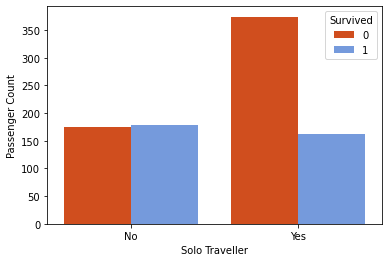

In [277]:
sns.countplot(data=titanic_train, x='SoloTraveller', palette=['#EE4000', 'cornflowerblue'], hue='Survived')
plt.xlabel('Solo Traveller')
plt.ylabel('Passenger Count')
plt.show()

In [302]:
titanic_train['Title'] = titanic_train['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])
titanic_test['Title'] = titanic_test['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [303]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item,Relatives,SoloTraveller,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,21171,A/5,1,No,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,17599,PC,1,No,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.,0,Yes,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,113803,NONE,1,No,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,373450,NONE,0,Yes,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,211536,NONE,0,Yes,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,112053,NONE,0,Yes,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,NaN,S,6607,W./C.,3,No,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,111369,NONE,0,Yes,Mr


In [281]:
title_group = titanic_train.groupby(['Title'])['Survived'].aggregate(['sum', 'count', 'mean'])
title_group.reset_index(inplace=True)
print(title_group)


           Title  sum  count      mean
0           Capt    0      1  0.000000
1            Col    1      2  0.500000
2            Don    0      1  0.000000
3             Dr    3      7  0.428571
4       Jonkheer    0      1  0.000000
5           Lady    1      1  1.000000
6          Major    1      2  0.500000
7         Master   23     40  0.575000
8           Miss  127    182  0.697802
9           Mlle    2      2  1.000000
10           Mme    1      1  1.000000
11            Mr   81    517  0.156673
12           Mrs   99    125  0.792000
13            Ms    1      1  1.000000
14           Rev    0      6  0.000000
15           Sir    1      1  1.000000
16  the Countess    1      1  1.000000


In [304]:
features = ['Pclass', 'Sex', 'Age', 'Embarked', 'Relatives', 'SoloTraveller', 'Title']
X_train = pd.get_dummies(titanic_train[features])
X_test = pd.get_dummies(titanic_test[features])
y_train = titanic_train['Survived'].values
y_true = gensub['Survived'].values

In [307]:
X_train.isna().sum()

Pclass                0
Age                   0
Relatives             0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
SoloTraveller_No      0
SoloTraveller_Yes     0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
dtype: int64

In [308]:
cols = X_train.columns.union(X_test.columns)

X_train = X_train.reindex(cols, axis=1, fill_value=0)
X_test = X_test.reindex(cols, axis=1, fill_value=0)

In [309]:
X_train.isna().sum()

Age                   0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Pclass                0
Relatives             0
Sex_female            0
Sex_male              0
SoloTraveller_No      0
SoloTraveller_Yes     0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dona            0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
dtype: int64

In [310]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            'weights': ['uniform', 'distance'], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', random_state=42),
        'params': { 
            'penalty': ['l1', 'l2'], 
            'C': [0.1, 1, 10]
        }
    }, 
    'tree': {
        'model': DecisionTreeClassifier(max_depth=5, random_state=42), 
        'params': {
            'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
            'min_samples_split': [2, 3, 4, 5], 
        }
    }
}

In [311]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, verbose=1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name, 
        'best_score': clf.best_score_, 
        'best_params': clf.best_params_, 
        'best_estimator': clf.best_estimator_
    })

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 44 candidates, totalling 220 fits


In [312]:
scores

[{'model': 'knn',
  'best_score': 0.8069612704789405,
  'best_params': {'algorithm': 'kd_tree',
   'n_neighbors': 5,
   'weights': 'uniform'},
  'best_estimator': KNeighborsClassifier(algorithm='kd_tree')},
 {'model': 'logistic_regression',
  'best_score': 0.8260435628648548,
  'best_params': {'C': 1, 'penalty': 'l1'},
  'best_estimator': LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')},
 {'model': 'tree',
  'best_score': 0.8204067541271736,
  'best_params': {'max_depth': 3, 'min_samples_split': 2},
  'best_estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}]

## Доп

### Полиномы Чебышева

x = -1:0.01:1;
T = [ones(size(x)); x];
for n = 3:6
    T(n, :) = 2*x.*T(n - 1, :) - T(n - 2, :);
end
plot(x, T)

In [59]:
x = np.arange(-1, 1.01, 0.01, dtype=float)
T = np.vstack([np.ones_like(x), x])

for n in range(2, 7):
    T_n = 2 * x * T[n - 1, :] - T[n - 2, :]
    T = np.vstack([T, T_n])

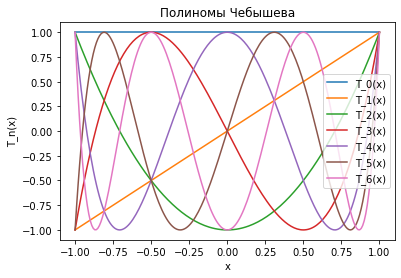

In [60]:
plt.plot(x, T.T)
plt.xlabel('x')
plt.ylabel('T_n(x)')
plt.title('Полиномы Чебышева')
plt.legend([f'T_{n}(x)' for n in range(T.shape[0])])
plt.show()

MLPClassifier -разобраться и рассказать

MLPClassifier в библиотеке scikit-learn представляет собой классификатор на основе многослойного персептрона (MLP), который является видом искусственной нейронной сети. MLP является мощным классом алгоритмов машинного обучения, способных моделировать сложные нелинейные отображения между входными и выходными данными.

In [32]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import metrics
from sklearn import datasets

### Classification

In [36]:
X, y = datasets.make_classification(n_features = 5, n_classes = 2, n_samples = 100) 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
model = MLPClassifier(max_iter = 5000)
model.fit(X_train, y_train)

MLPClassifier(max_iter=5000)

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.92

In [41]:
metrics.confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 1, 11]], dtype=int64)

In [42]:
model.classes_

array([0, 1])

In [46]:
# model.coefs_
model.loss_

0.07415656073701873

In [47]:
model.n_iter_

1235

In [48]:
model.out_activation_

'logistic'

In [51]:
model.score(X_test, y_test)

0.92

* hidden_layer_sizes - tuple, length = n_layers-2, значение по умолчанию (100,) i-й элемент представляет количество нейронов в i-м скрытом слое.

* активация - {'identity', 'logistic', 'tanh', 'relu'}, функция активации по умолчанию 'relu' скрытого слоя: 'identity', активация без операции, полезна для достижения линейных узких мест, return f (x) = x ; 'Logistic', функция логистической сигмоиды, возвращает f (x) = 1 / (1 + exp (-x)); 'tanh', гиперболическая функция tan, возвращает f (x) = tanh (x); 'relu' , Линейная единичная функция после выпрямления возвращает f (x) = max (0, x)

* solver - {‘Lbfgs’, ‘sgd’, «adam»}, по умолчанию «adam». Решатель для оптимизации веса: «lbfgs» - оптимизатор семейства квазиньютоновских методов, «sgd» относится к стохастическому градиентному спуску. «Адам» относится к оптимизатору на основе стохастического градиента, предложенному Кингмой, Дидериком и Джимми Ба. Примечание: решатель по умолчанию "adam" хорошо работает с временем обучения и оценками проверки на относительно больших наборах данных (содержащих тысячи обучающих выборок или более). Однако для небольших наборов данных «lbfgs» может сходиться быстрее и работать лучше.

* learning_rate - {'Constant', 'invscaling', 'adaptive'}, по умолчанию 'constant'. Используется для обновления веса. Используется только когда solver = 'sgd'. 'Constant' - это постоянная скорость обучения, заданная 'learning_rate_init'; ' invscaling »использует индекс обратного масштабирования« power_t »для постепенного уменьшения скорости обучения learning_rate_ на каждом временном шаге« t »,ffective_learning_rate = learning_rate_init / pow (t, power_t); до тех пор, пока потери в обучении продолжают уменьшаться,« адаптивный »будет поддерживать скорость обучения на уровне "learning_rate_init".

* max_iter - int, необязательный, значение по умолчанию 200. Максимальное количество итераций. Решатель выполняет итерации до сходимости (определяется по 'tol') или до числа итераций.

### Regression

In [30]:
X, y = datasets.make_regression(n_features = 5, n_samples = 100) 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
model = MLPRegressor(max_iter = 500000)
model.fit(X_train, y_train)

MLPRegressor(max_iter=500000)

In [34]:
y_pred = model.predict(X_test)

In [35]:
metrics.mean_squared_error(y_test, y_pred)

2.8005124093007265

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000


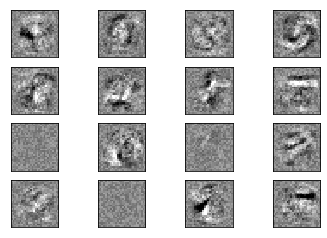

In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#### Пример

1. "Кошки любят молоко"
2. "Кошки любят лазить по деревьям"

Тогда:
- TF("кошки", документ 1) = 1/3, потому что "кошки" встречается один раз из трех слов.
- IDF("кошки", корпус) = log(2/2) + 1 = 1, потому что "кошки" встречается в обоих документах.
- TF-IDF("кошки", документ 1, корпус) = (1/3) * 1 = 1/3

Таким образом, вектор для документа "Кошки любят молоко" может быть [1/3, 0, 0, 1/3, 1/3], где каждый элемент представляет TF-IDF для каждого слова в корпусе (слова: "кошки", "любят", "молоко", "лазить", "деревьям").

Это TF-IDF векторизация позволяет учесть как частоту слова в конкретном документе, так и его важность в контексте всего корпуса документов.